In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
cd /gdrive/'My Drive'/employee_attrition

In [0]:
# HR Analytics-IBM Data
# Features:
# Age - Numerical
# Attrition - Employee leaving the company (0=no, 1=yes)
# Business Travel - (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
# Department - (1=HR, 2=R&D, 3=Sales)
# Distance From Home - Numerical Value
# Education - Numerical Value
# Education Field - (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
# EMPLOYEE COUNT Numerical Value
# EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID
# ENVIROMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIROMENT
# GENDER (1=FEMALE, 2=MALE)
# HOURLY RATE Numerical Value - HOURLY SALARY
# JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT
# JOB LEVEL Numerical Value - LEVEL OF JOB
# JOB ROLE (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
# JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB
# MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
# MONTHLY INCOME Numerical Value - MONTHLY SALARY
# MONTHY RATE Numerical Value - MONTHY RATE
# NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
# OVER 18 (1=YES, 2=NO)
# OVERTIME (1=NO, 2=YES)
# PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY.
# The parentage of change in salary between 2 year (2017, 2018).
# PERFORMANCE RATING Numerical Value - ERFORMANCE RATING
# RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
# STANDARD HOURS Numerical Value - STANDARD HOURS
# STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS.
# TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
# TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
# WORK LIFE BALANCE Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
# YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
# YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
# YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
# YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [0]:
# Downaloading the Dataset [.csv file]
# !wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv --output-document=emp_attrition.csv

In [5]:
# Installing required packages
!pip install aif360
!pip install pygal
!pip install cufflinks

     |████████████████████████████████| 56.4MB 54kB/s 
     |████████████████████████████████| 133kB 5.9MB/s 


In [6]:
#Importing all essential libraries
#Data Analysis
import pandas as pd
import pandas_profiling
import numpy as np
import json

#Visulaization libraries
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

#Sklearn
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import median_absolute_error
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, #For each feature split rule is random, not optimal
                              VotingClassifier, 
                              AdaBoostClassifier, 
                              BaggingRegressor)

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split,
                                     cross_validate)
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification

#XGBoost
from xgboost import XGBClassifier

import pickle

from sklearn.feature_selection import VarianceThreshold

#Bias Mitigation libraries
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display
from aif360.algorithms.preprocessing.reweighing import Reweighing


from IPython.display import SVG, display
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [7]:
#Pandas dataframe format for csv file 
df_data = pd.read_csv('emp_attrition.csv')
df_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
#Get list of columns in the dataset
df_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
#Dropping irrelevant features based on intuition
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df_data.drop(columns, inplace=True, axis=1)

In [10]:
#Getting description of all remaining columns
df_data.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,NaN,2,NaN,NaN,9,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,NaN,Male,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,NaN,882,NaN,NaN,326,NaN,673,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,2.721769,NaN,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,2.693197,NaN,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,1.093082,NaN,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,2.498009,NaN,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,2.000000,NaN,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,1.000000,NaN,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,3.000000,NaN,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,2.000000,NaN,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,4.000000,NaN,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,4.000000,NaN,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [11]:
# Data Preprocessing  
df_data.isnull().sum() # Getting the number of missing values in every feature

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [12]:
# Since most methods work with features expressed in numbers we will encode the features which have string values.
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data_encoded = df_data.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df_data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [13]:
data_encoded.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,7,4,2,5993,8,1,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,6,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,2,3,2,2090,6,1,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,6,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,2,2,1,3468,9,0,12,3,1,6,3,3,2,2,2,2


In [14]:
# Data Visualization 
data_encoded['Attrition'].value_counts()  # Counting the data in each class
# [Inference: Unbalanced Dataset]

0    1233
1     237
Name: Attrition, dtype: int64

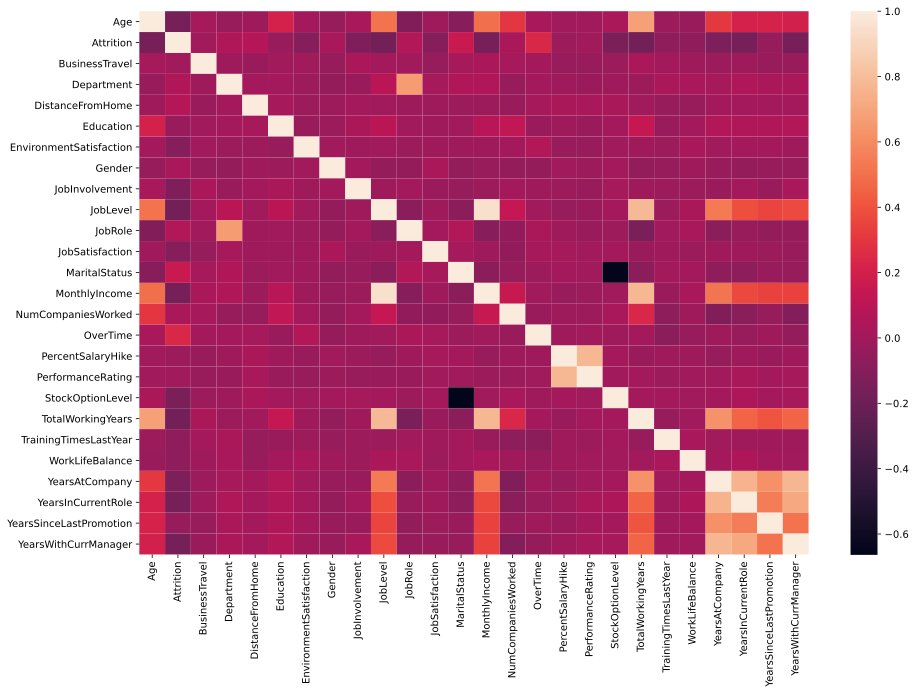

In [15]:
# Getting correlation in the features and output classes
data_correlation = data_encoded.corr()
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)
# [Inference :
#  1. Monthly income is highly correlated with Job level.
#  2. Job level is highly correlated with total working hours.
#  3. Monthly income is highly correlated with total working hours.
#  4. Age is also positively correlated with the Total working hours.
#  5. Marital status and stock option level are negatively correlated]

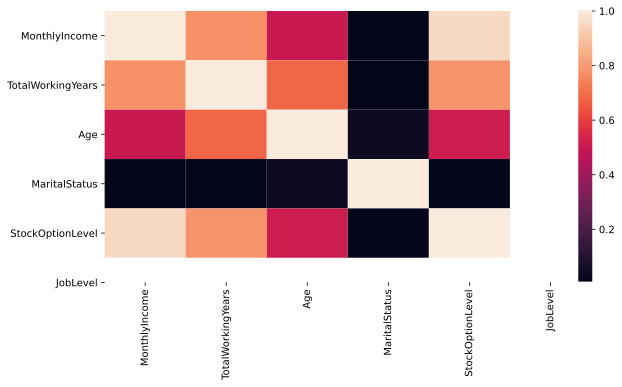

In [16]:
#Viewing the analysis obtained above 
data_corr_filtered = df_data[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [10,5]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

In [0]:
# Time analysis

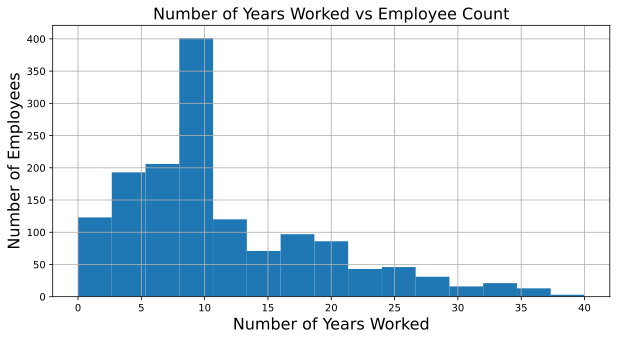

In [18]:
#Historgram of Years Worked vs Employee Count
ax = data_encoded['TotalWorkingYears'].hist(bins=15);
ax.set_xlabel("Number of Years Worked", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Number of Years Worked vs Employee Count", fontsize=16);

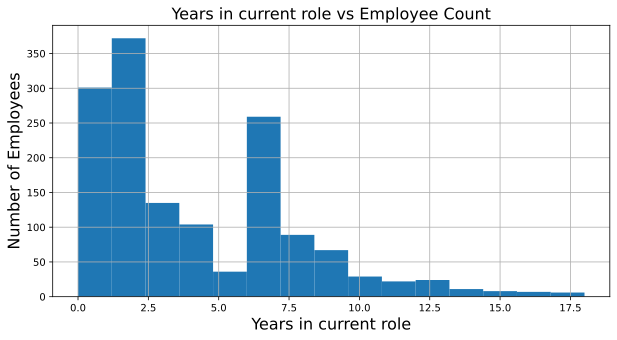

In [19]:
#Historgram of Number of Years In Current Role vs Employee Count
ax = data_encoded['YearsInCurrentRole'].hist(bins=15);
ax.set_xlabel("Years in current role", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Years in current role vs Employee Count", fontsize=16);

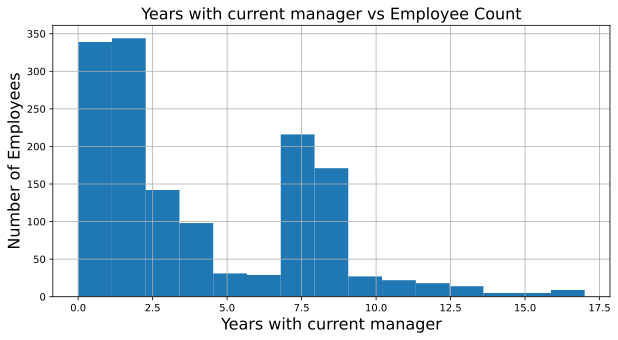

In [20]:
#Historgram of Number of Years with Current Manager at IBM vs Employee Count
ax = data_encoded['YearsWithCurrManager'].hist(bins=15);
ax.set_xlabel("Years with current manager", fontsize=16);
ax.set_ylabel("Number of Employees", fontsize=16);
ax.set_title("Years with current manager vs Employee Count", fontsize=16);

In [0]:
# Age analysis

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

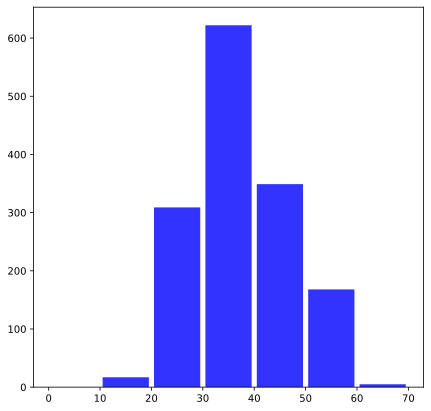

In [22]:
#Distribution of age of employees
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

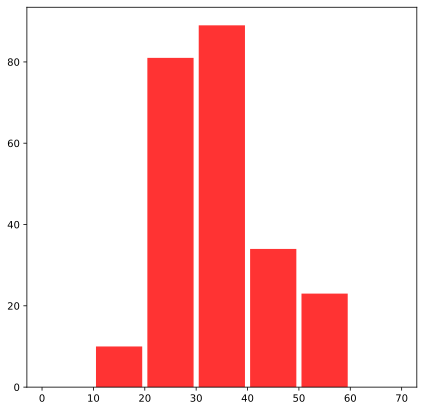

In [23]:
#Binning of age in multiples of 10 to see which age group are likely to leave the company.
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

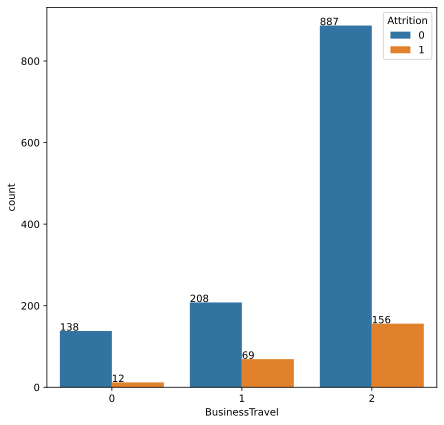

In [24]:
# Business Travel Analysis
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
#[Inference: Travel can not be a relevant feature for attrition]

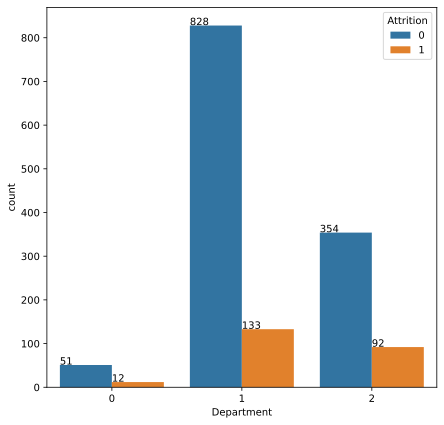

In [25]:
# Department Analysis
ax = sns.countplot(x="Department", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
# [Inference: 
#    1. 56% of employess from research and development department are likely to quit.
#    2. 38% of employees from sales department are likely to quit.]

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

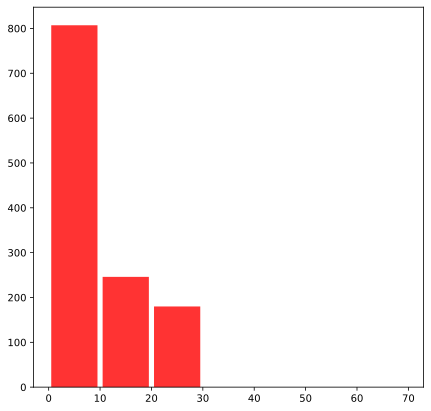

In [26]:
# Distance from Home analysis
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

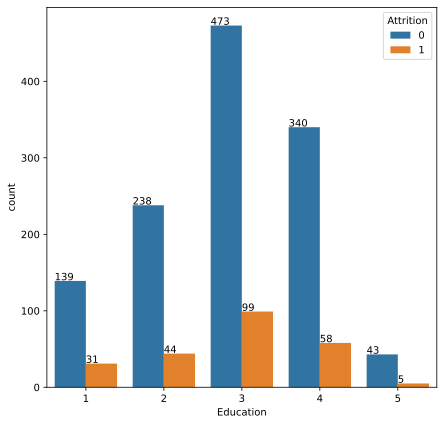

In [27]:
# Education Analysis
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [28]:
# Gender Analysis
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)
output_notebook() 

# x and y axes
Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()

print(count)

# Bokeh's mapping of column names and data lists
source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))

plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")

# Render and show the vbar plot
plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)

[501, 87, 732, 150]


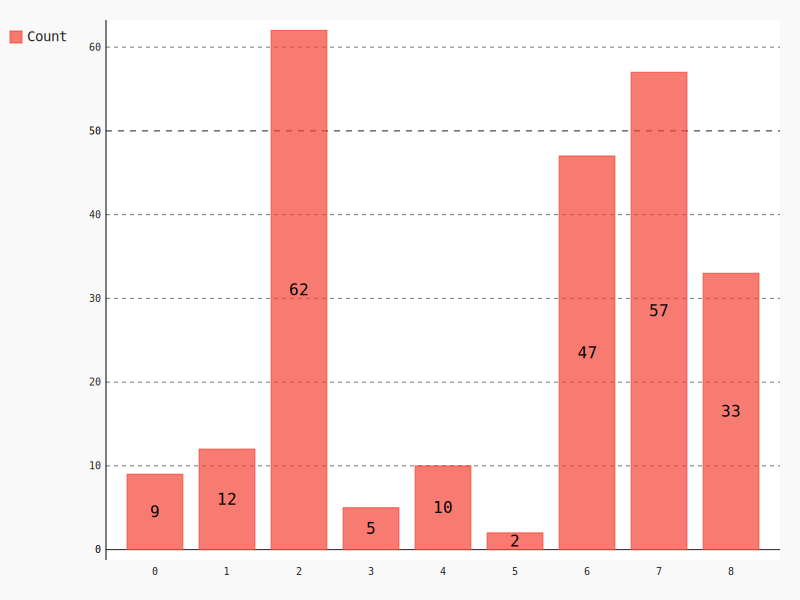

In [29]:
# Job Role Analysis
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()
#Considering attrition case
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]
import pygal
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))
# [Inference: Top 3 job roles facing attrition
#     1. 26% of employees who are likely to quit belong to Laboratory Technician group
#     2.24% of employees belong to Sales Executive group
#     3. 19% of employees belong to Research Scientist group]

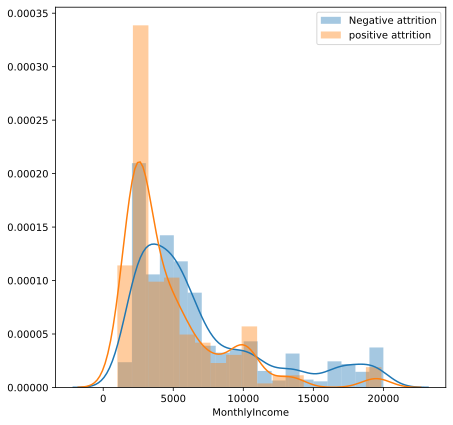

In [30]:
# Monthly Income Analysis
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()

In [31]:
# Model

# Getting labels
input_data = data_encoded.drop(['Attrition'], axis=1)
print(" Head of Input Data: ")
print(input_data.head())
target_data = data_encoded[['Attrition']]
print(" Head of Target: ")
print(target_data.head())
print(" Number of Features: ",len(input_data.columns))

 Head of Input Data: 
   Age  BusinessTravel  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   41               2  ...                        0                     5
1   49               1  ...                        1                     7
2   37               2  ...                        0                     0
3   33               1  ...                        3                     0
4   27               2  ...                        2                     2

[5 rows x 25 columns]
 Head of Target: 
   Attrition
0          1
1          0
2          1
3          0
4          0
 Number of Features:  25


In [32]:
# Getting final features

from prettytable import PrettyTable

# Mutual Information
#gives top 10 features having maximum mutual information value
t = PrettyTable(['Feature Name', 'Value'])
col_values = list(input_data.columns.values)
feature_scores = mutual_info_classif(input_data, target_data)
print("Mutual Information scores: ")
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    t.add_row([fname, score])
print(t)


#chi-square
#gives top 10 features having maximum chi-square value
t = PrettyTable(['Feature Name', 'Value'])
feature_scores = chi2(input_data, target_data)[0]
print("chi-square values: ")
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    t.add_row([fname, score])
print(t)

#column selection based on feature selection 
data_selected = df_data[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'Attrition']]

#encoding labels
data_selected.loc[data_selected.Attrition == 'No', 'Attrition'] = 0
data_selected.loc[data_selected.Attrition == 'Yes', 'Attrition'] = 1

input_data = data_selected.drop(['Attrition'], axis=1)
target_data = data_selected[['Attrition']]

Mutual Information scores: 
+-----------------------+----------------------+
|      Feature Name     |        Value         |
+-----------------------+----------------------+
|        OverTime       | 0.03774311836110944  |
|        JobRole        | 0.03528938929313785  |
|     MonthlyIncome     | 0.03373943029132409  |
|   YearsInCurrentRole  | 0.030065453868181713 |
|        JobLevel       | 0.027068951198558233 |
|     YearsAtCompany    | 0.02525050859649025  |
|   TotalWorkingYears   | 0.024517158067582034 |
|    StockOptionLevel   | 0.02083100510674485  |
|  YearsWithCurrManager | 0.01870332772272887  |
| TrainingTimesLastYear | 0.014292445810009546 |
+-----------------------+----------------------+
chi-square values: 
+----------------------+--------------------+
|     Feature Name     |       Value        |
+----------------------+--------------------+
|    MonthlyIncome     | 127922.29369381821 |
|  TotalWorkingYears   | 230.72161773754925 |
|    YearsAtCompany    | 142.1000543

In [33]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,1
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,0
2,2090,7,0,0,0,37,Yes,2,0,1,Laboratory Technician,3,Male,1
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,0
4,3468,6,2,2,2,27,No,2,1,1,Laboratory Technician,3,Male,0


In [0]:
# !wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/Pipeline_LabelEncoder-0.1.zip --output-document=Pipeline_LabelEncoder-0.1.zip

In [35]:
!pip install Pipeline_LabelEncoder-0.1.zip

Processing ./Pipeline_LabelEncoder-0.1.zip
  Created wheel for Pipeline-LabelEncoder: filename=Pipeline_LabelEncoder-0.1-cp36-none-any.whl size=2063 sha256=2a2ed04aa7965df272e273c24205b042b520535596d94e88fe5f6d6423cbf85c
  Stored in directory: /root/.cache/pip/wheels/98/14/53/59a07865ab66e8b90126f98c2b87052f977337d04157614e62
Successfully built Pipeline-LabelEncoder


In [36]:
#encoding training and validation data. 
#custom label encoder library
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).fit_transform(data_selected)

Inside fit transform
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature Gender
mapping {'Female': 0, 'Male': 1}


In [37]:
preprocessed_data.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,1,1,0,2,7,1,0,1
1,5130,10,10,7,7,49,0,8,1,2,6,3,1,0
2,2090,7,0,0,0,37,1,2,0,1,2,3,1,1
3,2909,8,8,7,0,33,1,3,0,1,6,3,0,0
4,3468,6,2,2,2,27,0,2,1,1,2,3,1,0


In [38]:
print (preprocessed_data.isnull().sum())

MonthlyIncome           0
TotalWorkingYears       0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
Age                     0
OverTime                0
DistanceFromHome        0
StockOptionLevel        0
JobLevel                0
JobRole                 0
WorkLifeBalance         0
Gender                  0
Attrition               0
dtype: int64


In [39]:
# Training a random forest classifier
from sklearn.model_selection import train_test_split
X=preprocessed_data.drop(['Attrition'], axis=1) 
y=preprocessed_data[['Attrition']]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) 


from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8425655976676385


No handles with labels found to put in legend.


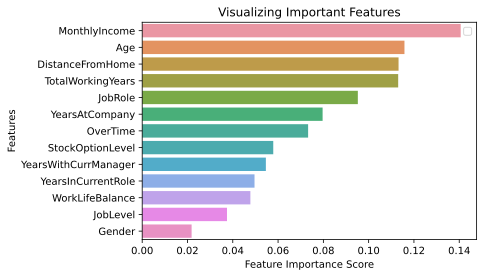

In [40]:
feature_names =  X.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [41]:
# Getting Train, Validation and test data

input_data = data_selected[0:1269]
print('Shape of the input data is ', input_data.shape)
input_data['Attrition'].value_counts()

validation_data = data_selected[1269:1469]
print('Shape of the validation data is ', validation_data.shape)
validation_input_data = validation_data.drop(['Attrition'], axis=1)
print('Shape of the validation input data is ', validation_input_data.shape)
validation_target_data = validation_data[['Attrition']]
print('Shape of the validation target data is ', validation_target_data.shape)

#Using 1 sample as test data
test_data = data_selected[1469:]
print(test_data)
print('Shape of the test data is ', test_data.shape)
test_input_data = test_data.drop(['Attrition'], axis=1)
print('Shape of the test input data is ', test_input_data.shape)
test_target_data = test_data[['Attrition']]
print('Shape of the test target data is ', test_target_data.shape)

Shape of the input data is  (1269, 14)
Shape of the validation data is  (200, 14)
Shape of the validation input data is  (200, 13)
Shape of the validation target data is  (200, 1)
      MonthlyIncome  TotalWorkingYears  ...  Gender  Attrition
1469           4404                  6  ...    Male          0

[1 rows x 14 columns]
Shape of the test data is  (1, 14)
Shape of the test input data is  (1, 13)
Shape of the test target data is  (1, 1)


In [42]:
#encoding training and validation data. 
#custom label encoder library
from Pipeline_LabelEncoder.sklearn_label_encoder import PipelineLabelEncoder
preprocessed_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).fit_transform(input_data)
print('-------------------------')
print('validation data encoding')
validation_enc_data = PipelineLabelEncoder(columns = ['OverTime', 'JobRole', 'Gender']).transform(validation_input_data)

Inside fit transform
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature Gender
mapping {'Female': 0, 'Male': 1}
-------------------------
validation data encoding
Feature OverTime
mapping {'No': 0, 'Yes': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature Gender
mapping {'Female': 0, 'Male': 1}


In [43]:
# Using AI Fairness 360 toolkit to detect bias 

# Gender is the protected attribute. 
#label 0: Employee will stay 
#label 1: Employee will leave
# Gender 0: Female and Gender 1: Male
privileged_groups = [{'Gender': 0}]
unprivileged_groups = [{'Gender': 1}]
favorable_label = 0 
unfavorable_label = 1

#Create binary label dataset that can be used by bias mitigation algorithms
BM_dataset = BinaryLabelDataset(favorable_label=favorable_label,
                                unfavorable_label=unfavorable_label,
                                df=preprocessed_data,
                                label_names=['Attrition'],
                                protected_attribute_names=['Gender'],
                                unprivileged_protected_attributes=unprivileged_groups)

display(Markdown("#### Training Data Details"))
print("shape of the training dataset", BM_dataset.features.shape)
print("Training data favorable label", BM_dataset.favorable_label)
print("Training data unfavorable label", BM_dataset.unfavorable_label)
print("Training data protected attribute", BM_dataset.protected_attribute_names)
print("Training data privileged protected attribute (1:Male and 0:Female)", 
      BM_dataset.privileged_protected_attributes)
print("Training data unprivileged protected attribute (1:Male and 0:Female)",
      BM_dataset.unprivileged_protected_attributes)

metric_orig_train = BinaryLabelDatasetMetric(BM_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % 
      metric_orig_train.mean_difference())
# Negative difference indicate the presence of bias.


RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(BM_dataset)
train_tf_dataset = RW.transform(BM_dataset)

metric_orig_train = BinaryLabelDatasetMetric(train_tf_dataset, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f"
      % metric_orig_train.mean_difference())

#### Training Data Details

shape of the training dataset (1269, 13)
Training data favorable label 0.0
Training data unfavorable label 1.0
Training data protected attribute ['Gender']
Training data privileged protected attribute (1:Male and 0:Female) [array([1.])]
Training data unprivileged protected attribute (1:Male and 0:Female) [array([0.])]
Difference in mean outcomes between unprivileged and privileged groups = -0.013894
Difference in mean outcomes between unprivileged and privileged groups = 0.000000


In [49]:
# Training and Testing AdaBoost Classifier
cls = AdaBoostClassifier(n_estimators=100)
estimator = [100, 150, 200, 250, 300, 400, 500, 700, 1000]
for i in estimator:
  cls = AdaBoostClassifier(n_estimators=i)
  clf.fit(X_train,y_train)
  print('--------------------------------------------------------------------------------------------')
  print('------    Results for {} estimators   ---------'.format(i))
  # prediction on test set
  y_pred=clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

--------------------------------------------------------------------------------------------
------    Results for 100 estimators   ---------
Accuracy: 0.8522837706511176
--------------------------------------------------------------------------------------------
------    Results for 150 estimators   ---------
Accuracy: 0.8464528668610302
--------------------------------------------------------------------------------------------
------    Results for 200 estimators   ---------
Accuracy: 0.847424684159378
--------------------------------------------------------------------------------------------
------    Results for 250 estimators   ---------
Accuracy: 0.8464528668610302
--------------------------------------------------------------------------------------------
------    Results for 300 estimators   ---------
Accuracy: 0.847424684159378
--------------------------------------------------------------------------------------------
------    Results for 400 estimators   ---------
Accur

In [0]:
# Best results are when estimators are 100 and 700